In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint

In [3]:
# Load all Inputs and Output Data

# 5 mins (1 step ahead)
Deep_train_5   = np.load("Deep_train_5.npz")['x'] 
Output_train_5 = np.load("Deep_train_5.npz")['y']

Deep_test_5   = np.load("Deep_test_5.npz")['x'] 
Output_test_5 = np.load("Deep_test_5.npz")['y'] 

# 15 mins (3 steps ahead)
Deep_train_15   = np.load("Deep_train_15.npz")['x'] 
Output_train_15 = np.load("Deep_train_15.npz")['y']

Deep_test_15   = np.load("Deep_test_15.npz")['x'] 
Output_test_15 = np.load("Deep_test_15.npz")['y']

# 30 mins (6 steps ahead)
Deep_train_30   = np.load("Deep_train_30.npz")['x'] 
Output_train_30 = np.load("Deep_train_30.npz")['y']

Deep_test_30   = np.load("Deep_test_30.npz")['x'] 
Output_test_30 = np.load("Deep_test_30.npz")['y']

# 60 mins (12 steps ahead)
Deep_train_60   = np.load("Deep_train_60.npz")['x'] 
Output_train_60 = np.load("Deep_train_60.npz")['y']

Deep_test_60   = np.load("Deep_test_60.npz")['x'] 
Output_test_60 = np.load("Deep_test_60.npz")['y']

## Input

#### 5 mins

In [4]:
# Train
Xt5 = Deep_train_5
yt5 = Output_train_5
# Test
Xv5 = Deep_test_5
yv5 = Output_test_5

#### 15 mins

In [5]:
# Train
Xt15 = Deep_train_15
yt15 = Output_train_15
# Test
Xv15 = Deep_test_15
yv15 = Output_test_15

#### 30 mins

In [6]:
# Train
Xt30 = Deep_train_30
yt30 = Output_train_30
# Test
Xv30 = Deep_test_30
yv30 = Output_test_30

#### 60 mins

In [7]:
# Train
Xt60 = Deep_train_60
yt60 = Output_train_60
# Test
Xv60 = Deep_test_60
yv60 = Output_test_60

## Check size

In [8]:
Xt5.shape

(31089, 15, 7)

In [9]:
Xt5[1]

array([[0.19153675, 0.15587045, 0.23584906, 0.26595745, 0.17495712,
        0.125     , 0.15434783],
       [0.21380846, 0.2145749 , 0.23018868, 0.23829787, 0.17324185,
        0.12689394, 0.14565217],
       [0.21380846, 0.17004049, 0.1754717 , 0.21276596, 0.15265866,
        0.15530303, 0.1826087 ],
       [0.19376392, 0.16194332, 0.20188679, 0.24255319, 0.15780446,
        0.11363636, 0.12173913],
       [0.11804009, 0.10526316, 0.13018868, 0.17021277, 0.0806175 ,
        0.05113636, 0.0673913 ],
       [0.09576837, 0.10728745, 0.11320755, 0.16808511, 0.08919383,
        0.07765152, 0.08913043],
       [0.13140312, 0.11538462, 0.14150943, 0.18723404, 0.10291595,
        0.09090909, 0.09565217],
       [0.18040089, 0.15789474, 0.17358491, 0.19787234, 0.10977702,
        0.08712121, 0.1173913 ],
       [0.14922049, 0.12753036, 0.15660377, 0.20638298, 0.14751286,
        0.09659091, 0.09782609],
       [0.12694878, 0.11538462, 0.11698113, 0.16808511, 0.09433962,
        0.0719697 , 0.0

## Transformations

In [10]:
n_features = 7
n_GAF = 15

# Summation
gasf = GramianAngularField(image_size=1., method='summation', sample_range=None)
# Difference
gadf = GramianAngularField(image_size=1., method='difference', sample_range=None)

In [11]:
train_sum_samples5 = np.empty((len(Xt5), n_features, n_GAF, n_GAF))

train_dif_samples5 = np.empty((len(Xt5), n_features, n_GAF, n_GAF))

In [12]:
train_sum_samples5.shape

(31089, 7, 15, 15)

In [13]:
for i in range(len(Xt5)):
    # Transpose data first because:
    # expected shape is (n_samples, n_timestamps)
    X = np.transpose(Xt5[i])
    
    # Perform the GAF transformations
    X_gasf = gasf.transform(X)
    X_gadf = gadf.transform(X)
    
    # Store value in the array to get the shape:
    # (samples, feature, n_GAF, n_GAF)
    train_sum_samples5[i,:,:,:] = X_gasf
    train_dif_samples5[i,:,:,:] = X_gadf

In [14]:
train_sum_samples5[0].shape

(7, 15, 15)

In [15]:
train_sum_samples5[0][0].shape

(15, 15)

## Plots

In [16]:
plt.rcParams.update({'font.size': 16})

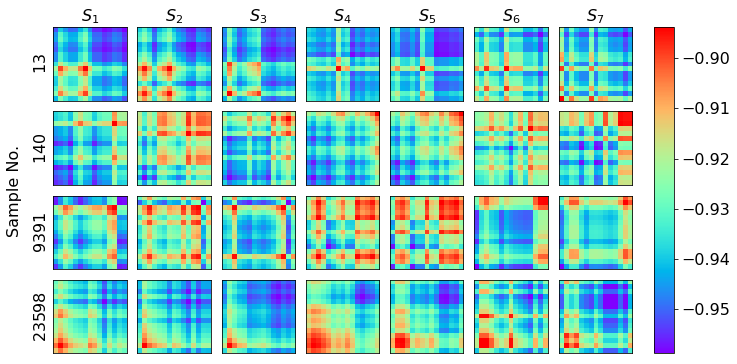

In [17]:
# Show the images for a random window slice
fig = plt.figure(figsize=(12, 6))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(4, 7),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
# images = [train_sum_samples5[140][3], train_dif_samples5[140][3]]
# titles = ['Summation', 'Difference']
images = [train_sum_samples5[13][0], train_sum_samples5[13][1], train_sum_samples5[13][2], train_sum_samples5[13][3], 
          train_sum_samples5[13][4], train_sum_samples5[13][5], train_sum_samples5[13][6], 
          train_sum_samples5[140][0], train_sum_samples5[140][1], train_sum_samples5[140][2], train_sum_samples5[140][3], 
          train_sum_samples5[140][4], train_sum_samples5[140][5], train_sum_samples5[140][6],
          train_sum_samples5[9391][0], train_sum_samples5[9391][1], train_sum_samples5[9391][2], train_sum_samples5[9391][3], 
          train_sum_samples5[9391][4], train_sum_samples5[9391][5], train_sum_samples5[9391][6], 
          train_sum_samples5[23598][0], train_sum_samples5[23598][1], train_sum_samples5[23598][2], train_sum_samples5[23598][3], 
          train_sum_samples5[23598][4], train_sum_samples5[23598][5], train_sum_samples5[23598][6]
         ]
titles = ['$S_1$', '$S_2$', '$S_3$', '$S_4$', '$S_5$', '$S_6$', '$S_7$', 
          '', '', '', '', '', '', '',
          '', '', '', '', '', '', '',
          '', '', '', '', '', '', '']
indexes = [i for i in range(28)]

for image, title, ax, index in zip(images, titles, grid, indexes):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 16})
    if index/7 == 0:
        ax.set_ylabel('$13$')
    elif index/7 == 1:
        ax.set_ylabel('$140$')
    elif index/7 == 2:
        ax.set_ylabel('$9391$')
    else:
        ax.set_ylabel('$23598$')

grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
fig.text(0.1, 0.5, 'Sample No.', va='center', rotation='vertical')
ax.cax.colorbar(im)
ax.cax.toggle_label(True)


#plt.suptitle('Gramian Angular Summation Fields (GASF)', y=0.98, fontsize=16)
plt.show()

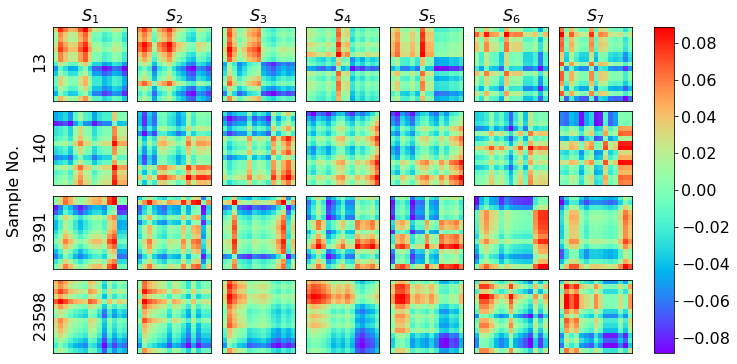

In [18]:
# Show the images for a random window slice
fig = plt.figure(figsize=(12, 6))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(4, 7),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
# images = [train_sum_samples5[140][3], train_dif_samples5[140][3]]
# titles = ['Summation', 'Difference']
images = [train_dif_samples5[13][0], train_dif_samples5[13][1], train_dif_samples5[13][2], train_dif_samples5[13][3], 
          train_dif_samples5[13][4], train_dif_samples5[13][5], train_dif_samples5[13][6], 
          train_dif_samples5[140][0], train_dif_samples5[140][1], train_dif_samples5[140][2], train_dif_samples5[140][3], 
          train_dif_samples5[140][4], train_dif_samples5[140][5], train_dif_samples5[140][6],
          train_dif_samples5[9391][0], train_dif_samples5[9391][1], train_dif_samples5[9391][2], train_dif_samples5[9391][3], 
          train_dif_samples5[9391][4], train_dif_samples5[9391][5], train_dif_samples5[9391][6], 
          train_dif_samples5[23598][0], train_dif_samples5[23598][1], train_dif_samples5[23598][2], train_dif_samples5[23598][3], 
          train_dif_samples5[23598][4], train_dif_samples5[23598][5], train_dif_samples5[23598][6]
         ]
titles = ['$S_1$', '$S_2$', '$S_3$', '$S_4$', '$S_5$', '$S_6$', '$S_7$', 
          '', '', '', '', '', '', '',
          '', '', '', '', '', '', '',
          '', '', '', '', '', '', '']
indexes = [i for i in range(28)]

for image, title, ax, index in zip(images, titles, grid, indexes):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 16})
    if index/7 == 0:
        ax.set_ylabel('$13$')
    elif index/7 == 1:
        ax.set_ylabel('$140$')
    elif index/7 == 2:
        ax.set_ylabel('$9391$')
    else:
        ax.set_ylabel('$23598$')

grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
fig.text(0.1, 0.5, 'Sample No.', va='center', rotation='vertical')
ax.cax.colorbar(im)
ax.cax.toggle_label(True)


#plt.suptitle('Gramian Angular Difference Fields (GADF)', y=0.98, fontsize=16)
plt.show()